In [1]:
import pickle

import plotly.plotly as py
py.sign_in('username', 'key')
import plotly.graph_objs as go

#import operator

#import copy
from random import shuffle

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

#from collections import defaultdict

from __future__ import division
import numpy as np
#import math
import statsmodels.api as sm
from sklearn import cross_validation, datasets, metrics, linear_model, decomposition, tree, ensemble
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score
#import matplotlib.pyplot as plt
#%matplotlib inline
#from sklearn.learning_curve import learning_curve
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.cross_validation import cross_val_score, train_test_split, KFold, StratifiedKFold
# from sklearn.pipeline import Pipeline
# from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [2]:
file = open("buzzfeed.pickle",'r')
buzzfeed = pickle.load(file)
file = open("viralnova.pickle", 'r')
viralnova = pickle.load(file)
file = open("headlines_2016_2014.pickle", 'r')
headlines_2016_2014 = pickle.load(file)
file = open("headlines_wsj_2016.pickle", 'r')
headlines_wsj_2016 = pickle.load(file)

buzzfeed = buzzfeed[0:19638]
headlines_wsj_2016 = headlines_wsj_2016[0:15500]
headlines_2016_2014 = headlines_2016_2014[0:15500]

headlines = []
headlines.extend(headlines_wsj_2016)
headlines.extend(headlines_2016_2014)

all_articles = []
all_articles.extend(buzzfeed)
all_articles.extend(viralnova)
all_articles.extend(headlines)

In [3]:
# split corpus into train and test
# do tfidf.fit on train
# combine train and test and do tfidf.transform on entire corpus

article_df = pd.DataFrame(all_articles)

article_df['y'] = 0
article_df['y'].ix[0:30999] = 1
#y = article_df[['y']]

train=article_df.sample(frac=0.8,random_state=200)
test=article_df.drop(train.index)
y_train = train['y']
y_test = test['y']
del train['y']
del test['y']

train_corpus = []
for title in train[0]:
    train_corpus.append(title)
test_corpus = []
for title in test[0]:
    test_corpus.append(title)

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [4]:
first_num_train = []
first_num_test = []
first_odd_train = []
first_odd_test = []
numbers = [str(num) for num in range(1,51)]
odds = [str(num) for num in range(1,51,2)]
for headline in train_corpus:
    if headline.split()[0] in numbers:
        first_num_train.append(1)
    else:
        first_num_train.append(0)
    if headline.split()[0] in odds:
        first_odd_train.append(1)
    else:
        first_odd_train.append(0)
for headline in test_corpus:
    if headline.split()[0] in numbers:
        first_num_test.append(1)
    else:
        first_num_test.append(0)
    if headline.split()[0] in odds:
        first_odd_test.append(1)
    else:
        first_odd_test.append(0)

In [5]:
stop_words = ['i','me','my','myself','we','our','ours','ourselves','yours','yourself','yourselves','he','him','his','himself',
    'she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','who','whom','this',
    'that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did',
    'doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against',
    'between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under',
    'again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most',
    'other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don',
    'should','now','d','ll','m','o','re','ve','y','ain','aren','couldn','didn','doesn','hadn','hasn','haven','isn','ma','mightn',
    'mustn','needn','shan','shouldn','wasn','weren','won','wouldn','said']

more_stop_words = [str(i) for i in range(1,1001)]
normal_stops = ['you', 'your', 'which', 'what']

all_stops = stop_words + more_stop_words# + normal_stops

tfidf_vectorizer = TfidfVectorizer(analyzer='word',
                                  ngram_range=(1, 3), stop_words=all_stops,
                                  min_df=3, max_df=1.0, max_features=None, strip_accents='unicode', token_pattern=r'\w{1,}',
                                  sublinear_tf=True)
tfidf_fit = tfidf_vectorizer.fit(train_corpus)

tfidf_transform = tfidf_fit.transform(train_corpus + test_corpus)

df_proper = pd.DataFrame(tfidf_transform.todense(), columns=[tfidf_vectorizer.get_feature_names()])

train = df_proper.ix[0:49599]
test = df_proper.ix[49600:61999]

In [6]:
#train['first_num'] = first_num_train
train['first_odd'] = first_odd_train
#test['first_num'] = first_num_test
test['first_odd'] = first_odd_test

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [7]:
#train['first_num'] = train['first_num'].astype('category')
#train['first_odd'] = train['first_odd'].astype('category')
#test['first_num'] = test['first_num'].astype('category')
#test['first_odd'] = test['first_odd'].astype('category')
train = pd.get_dummies(train, columns=['first_odd'])#, 'first_num'])
test = pd.get_dummies(test, columns=['first_odd'])#, 'first_num'])

In [8]:
model = LogisticRegression()

In [9]:
def model_info(train, test):
    model.fit(train, y_train)
    digit_prec=2
    truthvec = y_test
    try:
        model.predict_proba
        scorevec = model.predict_proba(test)[:,1]
        threshvec = np.unique(np.round(scorevec,digit_prec))
        numthresh = len(threshvec)
        tpvec = np.zeros(numthresh)
        fpvec = np.zeros(numthresh)
        fnvec = np.zeros(numthresh)
        for i in range(numthresh):
            thresh = threshvec[i]
            tpvec[i] = sum(truthvec[scorevec>=thresh])
            fpvec[i] = sum(1-truthvec[scorevec>=thresh])
            fnvec[i] = sum(truthvec[scorevec<thresh])
        recallvec = tpvec/(tpvec + fnvec)
        precisionvec = tpvec/(tpvec + fpvec)
        f1vec = 2*precisionvec*recallvec/(precisionvec + recallvec)
        f1_x = zip(threshvec, f1vec)
        f1_index = [i for i, v in enumerate(f1_x) if v[0] == 0.5][0]
        f1 = f1_x[f1_index][1]
        print 'f1-score' , f1

    except:
        scorevec = model.predict(test)
        print('F1: ', f1_score(y_test, scorevec))
    score = roc_auc_score(y_test, scorevec)
    print('AUC: ', score)
    rec_x = zip(threshvec, recallvec)
    rec_index = [i for i, v in enumerate(rec_x) if v[0] == 0.5][0]
    recall = rec_x[rec_index][1]
    print 'recall' , recall

    prec_x = zip(threshvec, precisionvec)
    prec_index = [i for i, v in enumerate(prec_x) if v[0] == 0.5][0]
    precision = prec_x[prec_index][1]
    print 'precision' , precision

    y_pred = model.predict(test)
    print 'accuracy' , accuracy_score(truthvec,y_pred)
    col_keep = []
    col_reg = []
    try:
        model.feature_importances_
        features = zip(model.feature_importances_, train.columns)
        features.sort(key = lambda t: t[0], reverse=True)
        for i in range(len(features)):
            if features[i][0] != 0:
                col_keep.append(features[i][1])
                print('Importance: ', features[i])
            else:
                col_reg.append(features[i][1])
    except:
        print('Intercept: ', model.intercept_)
        zipped = sorted(zip(model.coef_[0], train.columns), key= lambda t: abs(t[0]), reverse=True)
        for i in range(len(zipped)):
            if zipped[i][0] != 0:
                col_keep.append(zipped[i][1])
                print('Coefficient: ',zipped[i])
            else:
                col_reg.append(zipped[i][1])
    return model, col_keep, col_reg

In [10]:
model, col_keep, col_reg = model_info(train, test)

f1-score 0.942468874603
('AUC: ', 0.98529684618006153)
recall 0.929534510433
precision 0.955768278594
accuracy 0.942983870968
('Intercept: ', array([ 0.187389]))
('Coefficient: ', (16.004029244262615, u'you'))
('Coefficient: ', (8.8349959915916205, u'your'))
('Coefficient: ', (7.3241667104626975, u'people'))
('Coefficient: ', (6.6667099823796985, u'which'))
('Coefficient: ', (6.4959803140003531, u'dog'))
('Coefficient: ', (-5.955877075511812, u'review'))
('Coefficient: ', (5.8645973540897689, u'adorable'))
('Coefficient: ', (5.7708004151073009, u'hilarious'))
('Coefficient: ', (5.6996916395958879, u'everyone'))
('Coefficient: ', (5.2197949357675881, u'beautiful'))
('Coefficient: ', (5.2181972704608937, u'amazing'))
('Coefficient: ', (5.1844131666128135, u'something'))
('Coefficient: ', (5.0716967712951684, u'awesome'))
('Coefficient: ', (5.0547061610484594, u'actually'))
('Coefficient: ', (4.9407694656039371, u'guy'))
('Coefficient: ', (4.869700374948172, u'lgbt'))
('Coefficient: ', (4

In [24]:
test.head()

0  0 0  0 december  0 win  0 win rockies  000  000 people  \
49600  0.0  0.0         0.0    0.0            0.0  0.0         0.0   
49601  0.0  0.0         0.0    0.0            0.0  0.0         0.0   
49602  0.0  0.0         0.0    0.0            0.0  0.0         0.0   
49603  0.0  0.0         0.0    0.0            0.0  0.0         0.0   
49604  0.0  0.0         0.0    0.0            0.0  0.0         0.0   

       000 pounds  000 years  00s     ...       zoo  zoo animals  zoolander  \
49600         0.0        0.0  0.0     ...       0.0          0.0        0.0   
49601         0.0        0.0  0.0     ...       0.0          0.0        0.0   
49602         0.0        0.0  0.0     ...       0.0          0.0        0.0   
49603         0.0        0.0  0.0     ...       0.0          0.0        0.0   
49604         0.0        0.0  0.0     ...       0.0          0.0        0.0   

       zoom  zootopia  zte  zuckerberg  zynga  first_odd_0  first_odd_1  
49600   0.0       0.0  0.0         0.0    0.0          1.0          0.0  
49601   0.0       0.0  0.0         0.0    0.0          1.0          0.0  
49602   0.0       0.0  0.0         0.0    0.0          1.0          0.0  
49603   0.0       0.0  0.0         0.0    0.0          1.0          0.0  
49604   0.0       0.0  0.0         0.0    0.0          1.0          0.0  

[5 rows x 24843 columns]

In [61]:
text = '19 People'

In [47]:
print text

What Percent Introvert And Extrovert Are You Based On Your Opinions About Badass Women?


In [62]:
first_odd = []
odds = [str(num) for num in range(1,51,2)]
foo = tfidf_fit.transform([text])
if text.split()[0] in odds:
    first_odd.append(1)
else:
    first_odd.append(0)
df = pd.DataFrame(foo.todense(), columns=[tfidf_vectorizer.get_feature_names()])

In [63]:
df['first_odd'] = first_odd
df = pd.get_dummies(df, columns=['first_odd'])#, 'first_num'])

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Columns: 24843 entries, 0 to first_odd_0
dtypes: float64(24843)
memory usage: 194.2 KB


In [66]:
df.head()

0  0 0  0 december  0 win  0 win rockies  000  000 people  000 pounds  \
0  0.0  0.0         0.0    0.0            0.0  0.0         0.0         0.0   

   000 years  00s     ...       zoo  zoo animals  zoolander  zoom  zootopia  \
0        0.0  0.0     ...       0.0          0.0        0.0   0.0       0.0   

   zte  zuckerberg  zynga  first_odd_1  first_odd_0  
0  0.0         0.0    0.0          1.0          0.0  

[1 rows x 24843 columns]

In [65]:
if 'first_odd_0' in df.columns:
    df['first_odd_1'] = 0.0
else:
    df['first_odd_0'] = 0.0

In [58]:
df.shape

(1, 24843)

In [67]:
probs = model.predict_proba(df.iloc[0])[0]

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [68]:
print probs

[ 0.00201305  0.99798695]


In [35]:
#text = test_corpus[1]
#test3 = tfidf_fit.transform([text])
model.predict_proba(test.iloc[0])[0]
#print test3[0][0]

//anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


0.05726416522997424

In [14]:
import statsmodels.api as sm

In [16]:
len(col_keep)

166

In [15]:
train.shape

(49600, 25815)

In [ ]:
train2 = sm.add_constant(train, prepend=False)
y_train = list(y_train)
logit = sm.Logit(y_train, train2.drop(col_reg, axis=1))
result = logit.fit()
print result.summary()

In [11]:
len(col_keep)

202

In [12]:
train_reg = train.drop(col_reg, axis=1)
test_reg = test.drop(col_reg, axis=1)

In [13]:
model = ensemble.RandomForestClassifier(n_estimators=1000, max_depth=3, n_jobs=-1)

In [14]:
model, col_keep, col_reg = model_info(train_reg, test_reg)

f1-score 0.751082251082
('AUC: ', 0.89987658399910508)
recall 0.612680577849
precision 0.970259278088
accuracy 0.795967741935
('Importance: ', (0.17308862500273969, u'you'))
('Importance: ', (0.11951386985384643, u'your'))
('Importance: ', (0.088054213364022402, u'which'))
('Importance: ', (0.06086422214261112, u'things'))
('Importance: ', (0.057276262951373016, u'know'))
('Importance: ', (0.053425135166775994, u'u'))
('Importance: ', (0.040994389952332101, u'people'))
('Importance: ', (0.038452384180649599, u'times'))
('Importance: ', (0.032348137154087152, u'guess'))
('Importance: ', (0.031136940830947691, u'make'))
('Importance: ', (0.030364643274472605, u'what'))
('Importance: ', (0.025531847025861327, u'actually'))
('Importance: ', (0.024030543202263381, u'china'))
('Importance: ', (0.019449201258486679, u'like'))
('Importance: ', (0.018095443896502559, u'ever'))
('Importance: ', (0.017384931791369344, u'best'))
('Importance: ', (0.017066513874732507, u'says'))
('Importance: ', (0

In [15]:
model = ensemble.GradientBoostingClassifier(n_estimators=1000, max_depth=3)

In [17]:
len(col_keep)
train_reg = train.drop(col_reg, axis=1)
test_reg = test.drop(col_reg, axis=1)

In [ ]:
model, col_keep, col_reg = model_info(train_reg, test_reg)

In [49]:
rec_index = [i for i, v in enumerate(rec_x) if v[0] == 0.5][0]
recall = rec_x[rec_index][1]
print recall

prec_x = zip(threshvec, precisionvec)
prec_index = [i for i, v in enumerate(prec_x) if v[0] == 0.5][0]
precision = prec_x[prec_index][1]
print precision

y_pred = model.predict(test)
print(accuracy_score(truthvec,y_pred))

0.936276083467


In [65]:
headline8217 = [headline for headline in all_articles if '8217' in headline]

In [67]:
headline8217

[u'Morning Agenda:  A Who&#8217;s Who of Financiers Expected at Trump Fund-Raiser',
 u'Morning Agenda:  Pressures Grow After &#8216;Brexit&#8217; Vote',
 u'Think Like a Doctor: A Cough That Won&#8217;t Stop',
 u'Burning Economic Issues Behind America&#8217;s Wildfire Problem',
 u'Harry Potter&#8217;s a Dad: &#8216;Accio, Pacifier!&#8217;',
 u'How Periods Might Affect Women&#8217;s Athletic Performance',
 u'Do You Want Your Parents to Stop Asking You &#8216;How Was School?&#8217;',
 u'Panthers&#8217; Receivers Deliver, Mystifying Critics and Defenses',
 u'&#8216;Hamilton&#8217; Online Ticket Lottery Makes Website Crash',
 u'From Under Kabul&#8217;s Bridges, Addicts Get Help at Old U.S. Base ',
 u'Get Paid to Organize Your Children&#8217;s Closets (and Yours)',
 u'How You Justified 10 Lies (or Didn&#8217;t)',
 u'A Tabloid&#8217;s Photographs That Don&#8217;t Tell the Whole Story',
 u'After Forward&#8217;s Strong Words Feed Rivalry, Grizzlies Earn Anticlimactic Win',
 u'Obama&#8217;s Goal

In [10]:
def normalize_df(df):
    df_norm = df.copy()
    for i in df.columns:
        mean = df[i].mean()
        std = df[i].std()
        df_norm[i] = df_norm[i].apply(lambda x: (x - mean)/std)
    return df_norm

In [11]:
df_proper.shape

(62000, 24690)

In [19]:
#df_proper_normalized = normalize_df(df_proper)
# pca = decomposition.PCA(n_components=5)
# pca.fit(df_proper_normalized)
# print(pca.explained_variance_ratio_)
# df_pca = pca.transform(df_proper_normalized)

In [52]:
def model_info2(model, train, test, y_train, y_test):
    g = y['hicov']
    skf = StratifiedKFold(g, 5)
    f1_scores = []
    auc_scores = []
    for train_index, test_index in skf:
        X_train, X_test = X.loc[train_index,:], X.loc[test_index,:]
        y_train, y_test = g[train_index], g[test_index]
        model.fit(X_train, y_train)
        digit_prec=2
        truthvec = y_test
        try:
            model.predict_proba
            scorevec = model.predict_proba(X_test)[:,1]
            threshvec = np.unique(np.round(scorevec,digit_prec))
            numthresh = len(threshvec)
            tpvec = np.zeros(numthresh)
            fpvec = np.zeros(numthresh)
            fnvec = np.zeros(numthresh)
            for i in range(numthresh):
                thresh = threshvec[i]
                tpvec[i] = sum(truthvec[scorevec>=thresh])
                fpvec[i] = sum(1-truthvec[scorevec>=thresh])
                fnvec[i] = sum(truthvec[scorevec<thresh])
            recallvec = tpvec/(tpvec + fnvec)
            precisionvec = tpvec/(tpvec + fpvec)
            f1vec = 2*precisionvec*recallvec/(precisionvec + recallvec)
            x = zip(threshvec, f1vec)
            rec_x = zip(threshvec, recallvec)
            max_f1 = sorted(x, key=lambda m: m[1], reverse=True)[0]
            max_f1_thresh = max_f1[0]
            recall_index = [i for i, v in enumerate(rec_x) if v[0] == max_f1_thresh][0]
            recall = rec_x[recall_index][1]
            print('Max F1 is %f which is for threshold %f' %(max_f1[1], max_f1_thresh))
            print('Corresponding recall is %f' %recall)
            f1_scores.append(max_f1[1])
        except:
            scorevec = model.predict(X_test)
            f1_scr = f1_score(y_test, scorevec)
            print('F1: ', f1_scr)
            f1_scores.append(f1_scr)
        auc = roc_auc_score(y_test, scorevec)
        auc_scores.append(auc)
        print('AUC: ', auc)
    mean_f1 = np.mean(f1_scores)
    mean_auc = np.mean(auc_scores)
    print('Mean F1: ', mean_f1)
    print('Mean AUC: ', mean_auc)
    col_keep = []
    col_reg = []
    try:
        model.feature_importances_
        features = zip(model.feature_importances_, X_train.columns)
        features.sort(key = lambda t: t[0], reverse=True)
        for i in range(len(features)):
            if features[i][0] != 0:
                col_keep.append(features[i][1])
                print('Importance: ', features[i])
            else:
                col_reg.append(features[i][1])
    except:
        print('Intercept: ', model.intercept_)
        zipped = sorted(zip(model.coef_[0], X.columns), key= lambda t: abs(t[0]), reverse=True)
        for i in range(len(zipped)):
            if zipped[i][0] != 0:
                col_keep.append(zipped[i][1])
                print('Coefficient: ',zipped[i])
            else:
                col_reg.append(zipped[i][1])
    return model, col_keep, col_reg

In [88]:
with open('tfidf_final.pickle', 'wb') as handle:
    pickle.dump(tfidf_fit, handle)

In [89]:
with open('model_final.pickle', 'wb') as handle:
    pickle.dump(model, handle)

In [90]:
with open('tfidf_vectorizer_final.pickle', 'wb') as handle:
    pickle.dump(tfidf_vectorizer, handle)

In [17]:
# df = pd.DataFrame(tfidf_matrix.todense(), columns=[tfidf_vectorizer.get_feature_names()])
# df['y'] = 0
# df['y'].ix[0:30999] = 1
# y = df[['y']]

In [16]:
def model_info(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train)
    digit_prec=2
    truthvec = y_test
    try:
        model.predict_proba
        scorevec = model.predict_proba(X_test)[:,1]
        threshvec = np.unique(np.round(scorevec,digit_prec))
        numthresh = len(threshvec)
        tpvec = np.zeros(numthresh)
        fpvec = np.zeros(numthresh)
        fnvec = np.zeros(numthresh)
        for i in range(numthresh):
            thresh = threshvec[i]
            tpvec[i] = sum(truthvec[scorevec>=thresh])
            fpvec[i] = sum(1-truthvec[scorevec>=thresh])
            fnvec[i] = sum(truthvec[scorevec<thresh])
        recallvec = tpvec/(tpvec + fnvec)
        precisionvec = tpvec/(tpvec + fpvec)
        f1vec = 2*precisionvec*recallvec/(precisionvec + recallvec)
        x = zip(threshvec, f1vec)
        rec_x = zip(threshvec, recallvec)
        max_f1 = sorted(x, key=lambda m: m[1], reverse=True)[0]
        #max_recall = sorted(rec_x, key=lambda m: m[1], reverse=True)[0]
        #fpr, tpr, thresholds = roc_curve(y_test, scorevec)
        #plt.plot(fpr, tpr);
        #plt.plot(fpr,fpr, 'r--');
        #plt.xlabel("False Positive Rate (1 - Specificity)");
        #plt.ylabel("True Positive Rate (Sensitivity)");
        #print(score)
        print('Max F1: ', max_f1)

    except:
        scorevec = model.predict(X_test)
        print('F1: ', f1_score(y_test, scorevec))
    score = roc_auc_score(y_test, scorevec)
#     x = zip(threshvec, f1vec)
#     rec_x = zip(threshvec, recallvec)
#     max_f1 = sorted(x, key=lambda m: m[1], reverse=True)[0]
#     #max_recall = sorted(rec_x, key=lambda m: m[1], reverse=True)[0]
#     fpr, tpr, thresholds = roc_curve(y_test, scorevec)
#     plt.plot(fpr, tpr);
#     plt.plot(fpr,fpr, 'r--');
#     plt.xlabel("False Positive Rate (1 - Specificity)");
#     plt.ylabel("True Positive Rate (Sensitivity)");
    print('AUC: ', score)
#     print('Max F1: ', max_f1)
#    print('Max Recall: ', max_recall)
    col_keep = []
    col_reg = []
#     try:
#         model.feature_importances_
#         features = zip(model.feature_importances_, X_train.columns)
#         features.sort(key = lambda t: t[0], reverse=True)
#         for i in range(len(features)):
#             if features[i][0] != 0:
#                 col_keep.append(features[i][1])
#             else:
#                 col_reg.append(features[i][1])
#     except:
#         zipped = sorted(zip(model.coef_[0], X.columns), key= lambda t: abs(t[0]), reverse=True)
#         for i in range(len(zipped)):
#             if zipped[i][0] != 0:
#                 col_keep.append(zipped[i][1])
#             else:
#                 col_reg.append(zipped[i][1])
    return model, col_keep, col_reg

In [18]:
#df.head().iloc[:,:10]

In [19]:
# train=df.sample(frac=0.8,random_state=200)
# test=df.drop(train.index)
# y_train = train['y']
# y_test = test['y']
# del train['y']
# del test['y']

In [34]:
model = LogisticRegression()
model.fit(train, y_train)
digit_prec=2
truthvec = y_test
try:
    model.predict_proba
    scorevec = model.predict_proba(test)[:,1]
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)
    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    f1vec = 2*precisionvec*recallvec/(precisionvec + recallvec)
    x = zip(threshvec, f1vec)
    rec_x = zip(threshvec, recallvec)
    max_f1 = sorted(x, key=lambda m: m[1], reverse=True)[0]
    #max_recall = sorted(rec_x, key=lambda m: m[1], reverse=True)[0]
    #fpr, tpr, thresholds = roc_curve(y_test, scorevec)
    #plt.plot(fpr, tpr);
    #plt.plot(fpr,fpr, 'r--');
    #plt.xlabel("False Positive Rate (1 - Specificity)");
    #plt.ylabel("True Positive Rate (Sensitivity)");
    #print(score)
    print('Max F1: ', max_f1)

except:
    scorevec = model.predict(test)
    print('F1: ', f1_score(y_test, scorevec))
score = roc_auc_score(y_test, scorevec)
#     x = zip(threshvec, f1vec)
#     rec_x = zip(threshvec, recallvec)
#     max_f1 = sorted(x, key=lambda m: m[1], reverse=True)[0]
#     #max_recall = sorted(rec_x, key=lambda m: m[1], reverse=True)[0]
#     fpr, tpr, thresholds = roc_curve(y_test, scorevec)
#     plt.plot(fpr, tpr);
#     plt.plot(fpr,fpr, 'r--');
#     plt.xlabel("False Positive Rate (1 - Specificity)");
#     plt.ylabel("True Positive Rate (Sensitivity)");
print('AUC: ', score)

('Max F1: ', (0.46999999999999997, 0.94401156719415202))
('AUC: ', 0.98615022203953784)


In [20]:
#print(rec_x)

In [21]:
#log_reg, col_keep, col_reg = model_info2(LogisticRegression(penalty='l1', C=0.1), labeled_dummies, y)

In [106]:
d2 = defaultdict(int)
#for i in range(1,51):
for j in range(31000):
    title = all_articles[0:31000][j]
    numbers = [int(s) for s in title.split() if s.isdigit()]
#        if str(i) in all_articles[0:31000][j].split():
    for number in numbers:
        d2[number] += 1
for k,v in d2.items():
    if k > 60:
        del d2[k]

In [102]:
#d2_50 = sorted(d2.items(), key=operator.itemgetter(0))[1:51]

In [108]:
del d2[0]

In [39]:
keys = []
values = []
for k,v in d.items():
    keys.append(k)
    values.append(v)

<Container object of 60 artists>

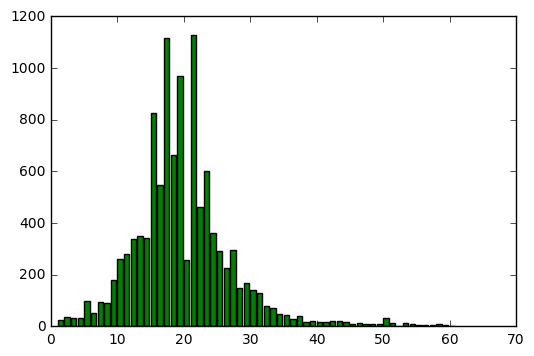

In [110]:
plt.bar(d2.keys(), d2.values(), color='g')

In [75]:
bf = pd.read_csv('buzzfeed_facebook.csv')

In [77]:
bf.columns

Index([u'title', u'Title', u'url', u'Author', u'Time Posted (EST)',
       u'Category', u'Badge', u'Responses', u'# Facebook Shares', u'# Tweets',
       u'# Facebook Comments'],
      dtype='object')

In [78]:
del bf['title']

In [79]:
bf.columns = ['Title', 'url', 'Author', 'Time', 'Category', 'Badge', 'Responses', 'FBShares', 'Tweets', 'FBComments']

In [80]:
bf.head()

Title  \
0  Orangutan Granted Basic Legal Rights In Argentina   
1  French Police Respond To Two Attacks By Men Sh...   
2  Football Fans Reportedly Struck By Lightning F...   
3  Florida State Quarterback Jameis Winston Wins ...   
4  19 Parents Who Took Parenting To A Whole New L...   

                                                 url  \
0  http://www.buzzfeed.com/mbvd/orangutan-granted...   
1  http://www.buzzfeed.com/claudiakoerner/french-...   
2  http://www.buzzfeed.com/lindseyadler/football-...   
3  http://www.buzzfeed.com/lindseyadler/florida-s...   
4  http://www.buzzfeed.com/laraparker/19-parents-...   

                     Author                 Time Category Badge  Responses  \
0  Michelle Broder Van Dyke  12/21/2014 23:51:21    world   NaN         22   
1           Claudia Koerner  12/21/2014 19:01:04    world   NaN          2   
2             Lindsey Adler  12/21/2014 17:39:07   sports   NaN          5   
3             Lindsey Adler  12/21/2014 17:16:22   sports   NaN         20   
4               Lara Parker  12/21/2014 13:22:39  parents   NaN         67   

  FBShares  Tweets  FBComments  
0      731     173          15  
1       86       7           4  
2       38      61           2  
3      128     161          13  
4    1,342      86          15

In [81]:
bf['FBShares'] = bf['FBShares'].apply(lambda x: x.replace(',', '')).astype(int)

In [175]:
bf_fb_info = dict()

In [162]:
len(bf)

60378

In [176]:
for i in range(1,101):
    sum_occ = 0
    sum_shares = 0
    sum_tweets = 0
    sum_resp = 0
    sum_comm = 0
    for j in range(len(bf)):
        if str(i) in bf['Title'][j].split()[0:5]:
#        if str(i) + " " in bf['Title'][j][0:10]:
            sum_occ += 1
            sum_shares += bf['FBShares'][j]
            sum_tweets += bf['Tweets'][j]
            sum_resp += bf['Responses'][j]
            sum_comm += bf['FBComments'][j]
    if sum_occ > 0:
        avg_shares = sum_shares/sum_occ
        avg_tweets = sum_tweets/sum_occ
        avg_resp = sum_resp/sum_occ
        avg_comm = sum_comm/sum_occ
        bf_fb_info[i] = [sum_occ, sum_shares, sum_tweets, sum_resp, sum_comm, avg_shares, avg_tweets, avg_resp, avg_comm]

In [177]:
shares = dict()
comments = dict()
responses = dict()
occurences = dict()
tweets = dict()
avg_shares = dict()
avg_comments = dict()
avg_responses = dict()
avg_tweets = dict()
for k,v in bf_fb_info.items():
    occurences[k] = v[0]
    shares[k] = v[1]
    tweets[k] = v[2]
    responses[k] = v[3]
    comments[k] = v[4]
    avg_shares[k] = v[5]
    avg_tweets[k] = v[6]
    avg_responses[k] = v[7]
    avg_comments[k] = v[8]

<Container object of 100 artists>

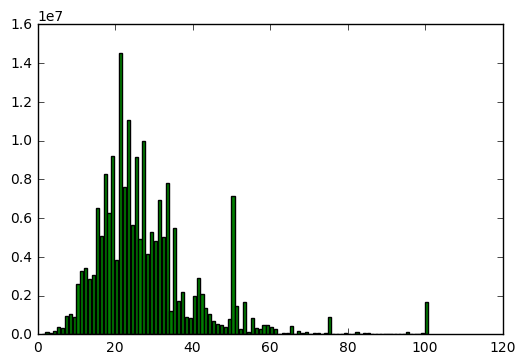

In [165]:
plt.bar(shares.keys(), shares.values(), color='g')

In [6]:
data = [go.Bar(
            x=d.keys(),
            y=d.values()
    )]
layout = go.Layout(
    #title='Buzzfeed List Number Occurrences - 2014 (Different Dataset)',
    xaxis=dict(
        title='List Number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Frequency',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig) #filename='styling-names')

In [181]:
data = [go.Bar(
            x=shares.keys(),
            y=shares.values()
    )]

py.iplot(data) #filename='basic-bar')

In [186]:
data = [go.Bar(
            x=avg_shares.keys(),
            y=avg_shares.values()
    )]
layout = go.Layout(
    title='Buzzfeed Average Article Facebook Shares - 2014 (Different Dataset)',
    xaxis=dict(
        title='List Number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Avg Facebook Shares',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig) #filename='styling-names')

<Container object of 100 artists>

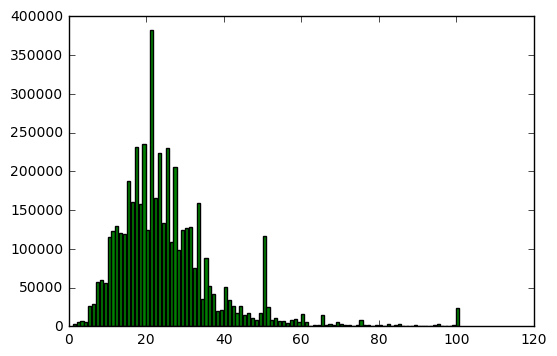

In [166]:
plt.bar(tweets.keys(), tweets.values(), color='g')

In [187]:
data = [go.Bar(
            x=avg_tweets.keys(),
            y=avg_tweets.values()
    )]
layout = go.Layout(
    title='Buzzfeed Average Article Tweets - 2014 (Different Dataset)',
    xaxis=dict(
        title='List Number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Avg Tweets',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig) #filename='styling-names')

In [180]:
data = [go.Bar(
            x=avg_tweets.keys(),
            y=avg_tweets.values()
    )]

py.iplot(data) #filename='basic-bar')

<Container object of 100 artists>

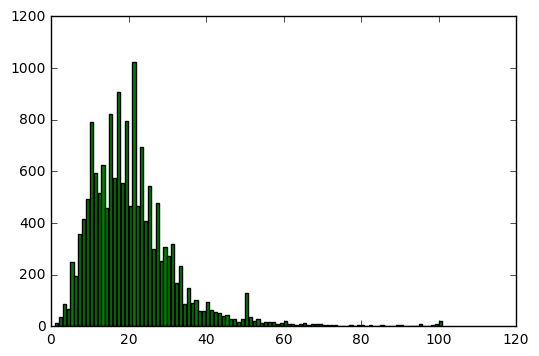

In [167]:
plt.bar(occurences.keys(), occurences.values(), color='g')

<Container object of 100 artists>

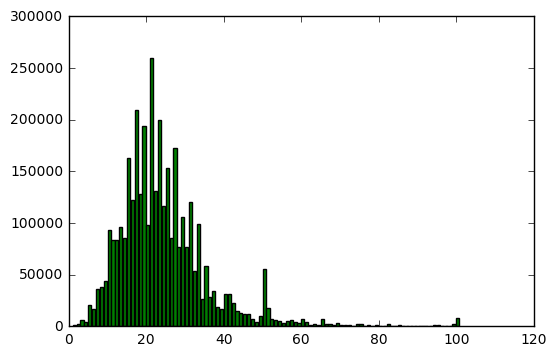

In [168]:
plt.bar(responses.keys(), responses.values(), color='g')

<Container object of 100 artists>

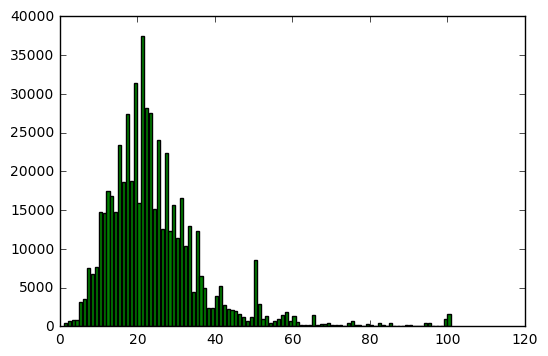

In [169]:
plt.bar(comments.keys(), comments.values(), color='g')

In [188]:
data = [go.Bar(
            x=avg_comments.keys(),
            y=avg_comments.values()
    )]
layout = go.Layout(
    title='Buzzfeed Average Facebook Comments - 2014 (Different Dataset)',
    xaxis=dict(
        title='List Number',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Avg Facebook Comments',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
fig = go.Figure(data=data, layout=layout)
plot_url = py.plot(fig) #filename='styling-names')

In [121]:
fb_shares = defaultdict(list)
for i in range(1,61):
    for j in range(len(bf)):
        if str(i) in bf['Title'][j].split():
            fb_shares[i].append(bf['FBShares'][j])

In [158]:
#for i in range(1,61):
#    print (i, np.mean(fb_shares[i]))

In [123]:
bf_authors = defaultdict(int)
for i in range(1,61):
    for j in range(len(bf)):
        if str(i) in bf['Title'][j].split():
            bf_authors[(bf['Author'][j],i)] += 1

In [124]:
bf_authors

defaultdict(int,
            {('Tay Mabelitini', 13): 1,
             ('catiejane', 20): 1,
             ('Travis Rand Greenwood', 23): 1,
             ('Jessica Testa', 13): 2,
             ('Michelle Broder Van Dyke', 24): 1,
             ('Dan Martin', 11): 1,
             ('Sarah Karlan', 28): 1,
             ('UlyssesPress', 11): 1,
             ('Maria Sherman', 17): 2,
             ('Stephanie Anderson', 35): 1,
             ('Julia Pugachevsky', 30): 2,
             ('Whitney Jefferson', 17): 15,
             ('Dorsey Shaw', 21): 2,
             ('Autumn Jones', 21): 1,
             ('Flora Ivezaj', 23): 1,
             ('Angela Vitello', 17): 1,
             ('Diane Szulecki', 10): 2,
             ('Claire Rees', 21): 1,
             ('Rachel Wilkerson Miller', 23): 2,
             ('Clara B.', 16): 1,
             ('Adrienne Enderle', 12): 1,
             ('Morgan Shanahan', 39): 1,
             ('Christine Byrne', 27): 16,
             ('Jeneva Rose', 33): 1,
             ('

In [141]:
author_bf = defaultdict(list)
for k,v in bf_authors.items():
    if " " in k[0]:
        author_bf[k[0]].append([k[1],v])

In [142]:
author_bf

defaultdict(list,
            {'A. Salt': [[21, 1]],
             'Aaron Calvin': [[24, 1],
              [6, 3],
              [43, 1],
              [7, 1],
              [10, 1],
              [47, 1],
              [8, 1],
              [9, 3],
              [14, 1],
              [16, 1],
              [12, 1],
              [17, 1],
              [13, 3],
              [23, 1],
              [20, 1],
              [21, 1]],
             'Abby Elyssa': [[14, 1], [15, 3]],
             'Abe Forman-Greenwald': [[7, 1], [24, 1], [14, 1], [11, 1]],
             'Above Average': [[7, 3]],
             'Adam B. Vary': [[2, 1],
              [1, 2],
              [7, 1],
              [42, 1],
              [6, 3],
              [5, 2],
              [40, 1],
              [4, 2],
              [11, 2],
              [10, 5],
              [9, 3],
              [8, 5],
              [15, 1],
              [18, 1],
              [17, 1],
              [16, 1],
              [12, 2],
     

In [127]:
author_total_articles = defaultdict(int)
for i in range(1,61):
    for j in range(len(bf)):
        if str(i) in bf['Title'][j].split() and ' ' in bf['Author'][j]:
            author_total_articles[bf['Author'][j]] += 1

In [128]:
author_total_articles

defaultdict(int,
            {'A. Salt': 1,
             'Aaron Calvin': 22,
             'Abby Elyssa': 4,
             'Abe Forman-Greenwald': 4,
             'Above Average': 3,
             'Adam B. Vary': 39,
             'Adam Bellow': 1,
             'Adam Bianchi': 2,
             'Adam Clement': 1,
             'Adam Davis': 43,
             'Adam Ellis': 50,
             'Adam Johnson': 1,
             'Adam Moerder': 20,
             'Adam Scott': 1,
             'Adam Unze': 3,
             'Adelaide Dever': 1,
             'Adolfo Flores': 2,
             'Adrian Carrasquillo': 10,
             "Adrienne Dene'": 3,
             'Adrienne Enderle': 3,
             'Adrienne Smith': 1,
             'Ahmed Ali Akbar': 5,
             'Ailbhe Malone': 173,
             'Alan White': 27,
             'Alana Massey': 4,
             'Alanna Okun': 386,
             'Alec Nixon': 2,
             'Alejandro Alba': 12,
             'Aleksander Chan': 1,
             'Alessia Santor

In [129]:
top20_author = sorted(author_total_articles.items(), key=operator.itemgetter(1), reverse=True)[:20]

In [130]:
top20_author

[('Lauren Yapalater', 661),
 ('Brian Galindo', 529),
 ('Leonora Epstein', 440),
 ('Alanna Okun', 386),
 ('Peggy Wang', 337),
 ('Whitney Jefferson', 294),
 ('Chelsea Marshall', 271),
 ('Krutika Mallikarjuna', 254),
 ('Rachel Sanders', 254),
 ('Matt Stopera', 243),
 ('Summer Anne Burton', 201),
 ('Matthew Perpetua', 196),
 ('Mike Spohr', 194),
 ('Sami Main', 186),
 ('Andrew Kaczynski', 185),
 ('Jack Moore', 182),
 ('Matt Kiebus', 178),
 ('Emily Fleischaker', 178),
 ('Donna Dickens', 176),
 ('Matt Bellassai', 174)]

In [143]:
author_bf['Lauren Yapalater']

[[31, 3],
 [33, 5],
 [4, 1],
 [2, 2],
 [46, 1],
 [3, 7],
 [23, 14],
 [44, 1],
 [45, 2],
 [19, 36],
 [5, 8],
 [42, 3],
 [43, 2],
 [40, 1],
 [14, 7],
 [13, 14],
 [50, 4],
 [22, 12],
 [10, 54],
 [11, 24],
 [51, 1],
 [20, 5],
 [21, 17],
 [9, 130],
 [29, 5],
 [18, 25],
 [15, 7],
 [6, 1],
 [8, 110],
 [17, 58],
 [30, 8],
 [16, 23],
 [26, 7],
 [25, 7],
 [28, 4],
 [7, 5],
 [39, 1],
 [36, 2],
 [24, 8],
 [37, 1],
 [27, 16],
 [12, 12],
 [35, 2],
 [32, 5]]

<Container object of 44 artists>

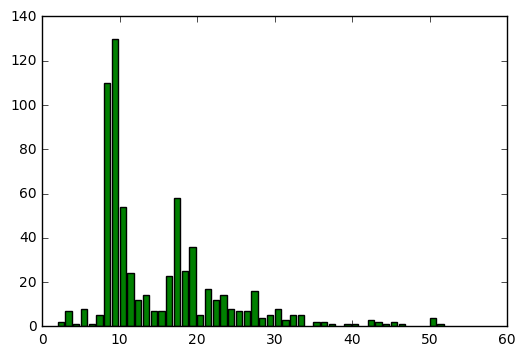

In [147]:
name = 'Lauren Yapalater'
nums = []
totals = []
for entry in range(len(author_bf[name])):
    nums.append(author_bf[name][entry][0])
    totals.append(author_bf[name][entry][1])
plt.bar(nums, totals, color='g')

<Container object of 47 artists>

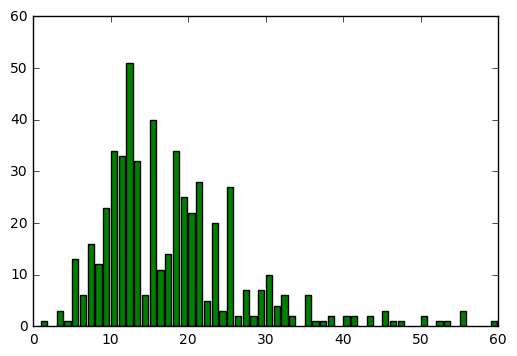

In [148]:
name = 'Brian Galindo'
nums = []
totals = []
for entry in range(len(author_bf[name])):
    nums.append(author_bf[name][entry][0])
    totals.append(author_bf[name][entry][1])
plt.bar(nums, totals, color='g')

<Container object of 41 artists>

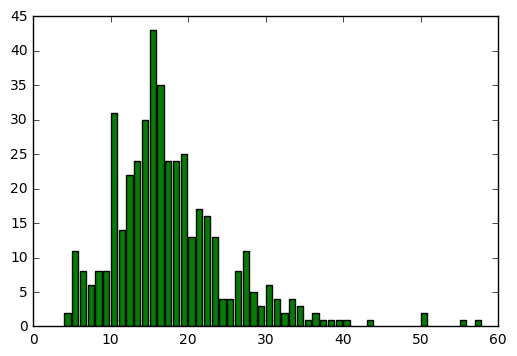

In [149]:
name = 'Leonora Epstein'
nums = []
totals = []
for entry in range(len(author_bf[name])):
    nums.append(author_bf[name][entry][0])
    totals.append(author_bf[name][entry][1])
plt.bar(nums, totals, color='g')

<Container object of 44 artists>

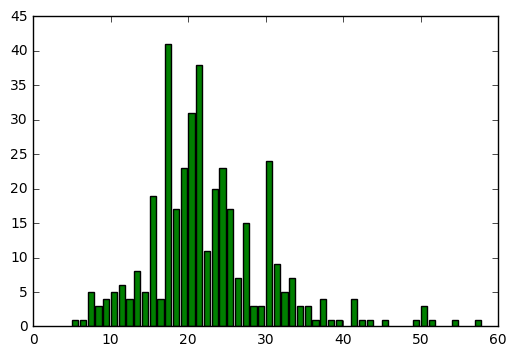

In [150]:
name = 'Alanna Okun'
nums = []
totals = []
for entry in range(len(author_bf[name])):
    nums.append(author_bf[name][entry][0])
    totals.append(author_bf[name][entry][1])
plt.bar(nums, totals, color='g')

In [157]:
data = [go.Bar(
            x=totals,
            y=nums,
            orientation = 'h'
)]

py.iplot(data)

In [159]:
author_boxplot_data = defaultdict(list)
for i in range(1,51):
    for j in range(len(bf)):
        if str(i) in bf['Title'][j].split() and ' ' in bf['Author'][j]:
            author_boxplot_data[bf['Author'][j]].append(i)

In [160]:
author_boxplot_data

defaultdict(list,
            {'A. Salt': [21],
             'Aaron Calvin': [6,
              6,
              6,
              7,
              8,
              9,
              9,
              9,
              10,
              12,
              13,
              13,
              13,
              14,
              16,
              17,
              20,
              21,
              23,
              24,
              43,
              47],
             'Abby Elyssa': [14, 15, 15, 15],
             'Abe Forman-Greenwald': [7, 11, 14, 24],
             'Above Average': [7, 7, 7],
             'Adam B. Vary': [1,
              1,
              2,
              4,
              4,
              5,
              5,
              6,
              6,
              6,
              7,
              8,
              8,
              8,
              8,
              8,
              9,
              9,
              9,
              10,
              10,
              10,
             

In [161]:
articles_written = dict()
for k,v in author_boxplot_data.items():
    articles_written[k] = len(v)

In [163]:
top20_authors = sorted(articles_written.items(), key=operator.itemgetter(1), reverse=True)[:20]

In [165]:
top20_authors

[('Lauren Yapalater', 660),
 ('Brian Galindo', 523),
 ('Leonora Epstein', 438),
 ('Alanna Okun', 383),
 ('Peggy Wang', 324),
 ('Whitney Jefferson', 289),
 ('Chelsea Marshall', 268),
 ('Rachel Sanders', 252),
 ('Krutika Mallikarjuna', 250),
 ('Matt Stopera', 232),
 ('Summer Anne Burton', 195),
 ('Mike Spohr', 193),
 ('Matthew Perpetua', 191),
 ('Sami Main', 184),
 ('Andrew Kaczynski', 183),
 ('Jack Moore', 181),
 ('Donna Dickens', 176),
 ('Matt Kiebus', 176),
 ('Matt Bellassai', 174),
 ('Emily Fleischaker', 174)]

In [167]:
authors = []
top20_author_boxplot = author_boxplot_data.copy()
for entry in top20_authors:
    authors.append(entry[0])
for k,v in top20_author_boxplot.items():
    if k not in authors:
        del top20_author_boxplot[k]

In [171]:
top20_author_boxplot

defaultdict(list,
            {'Alanna Okun': [5,
              6,
              7,
              7,
              7,
              7,
              7,
              8,
              8,
              8,
              9,
              9,
              9,
              9,
              10,
              10,
              10,
              10,
              10,
              11,
              11,
              11,
              11,
              11,
              11,
              12,
              12,
              12,
              12,
              13,
              13,
              13,
              13,
              13,
              13,
              13,
              13,
              14,
              14,
              14,
              14,
              14,
              15,
              15,
              15,
              15,
              15,
              15,
              15,
              15,
              15,
              15,
              15,
              15,
         

In [172]:
author_list = []
boxplot_data = []
for k,v in top20_author_boxplot.items():
    author_list.append(k)
    boxplot_data.append(v)


In [173]:
author_list

['Alanna Okun',
 'Matt Stopera',
 'Lauren Yapalater',
 'Donna Dickens',
 'Jack Moore',
 'Peggy Wang',
 'Matthew Perpetua',
 'Whitney Jefferson',
 'Krutika Mallikarjuna',
 'Matt Bellassai',
 'Brian Galindo',
 'Summer Anne Burton',
 'Chelsea Marshall',
 'Mike Spohr',
 'Matt Kiebus',
 'Rachel Sanders',
 'Andrew Kaczynski',
 'Sami Main',
 'Emily Fleischaker',
 'Leonora Epstein']

In [174]:
boxplot_data

[[5,
  6,
  7,
  7,
  7,
  7,
  7,
  8,
  8,
  8,
  9,
  9,
  9,
  9,
  10,
  10,
  10,
  10,
  10,
  11,
  11,
  11,
  11,
  11,
  11,
  12,
  12,
  12,
  12,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  13,
  14,
  14,
  14,
  14,
  14,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  15,
  16,
  16,
  16,
  16,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  17,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  18,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  19,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,
  20,


In [175]:
y0 = boxplot_data[0]
y1 = boxplot_data[1]
y2 = boxplot_data[2]
y3 = boxplot_data[3]
y4 = boxplot_data[4]
y5 = boxplot_data[5]
y6 = boxplot_data[6]
y7 = boxplot_data[7]
y8 = boxplot_data[8]
y9 = boxplot_data[9]
y10 = boxplot_data[10]
y11 = boxplot_data[11]
y12 = boxplot_data[12]
y13 = boxplot_data[13]
y14 = boxplot_data[14]
y15 = boxplot_data[15]
y16 = boxplot_data[16]
y17 = boxplot_data[17]
y18 = boxplot_data[18]
y19 = boxplot_data[19]

trace0 = go.Box(
    y=y0
)
trace1 = go.Box(
    y=y1
)
trace2 = go.Box(
    y=y2
)
trace3 = go.Box(
    y=y3
)
trace4 = go.Box(
    y=y4
)
trace5 = go.Box(
    y=y5
)
trace6 = go.Box(
    y=y6
)
trace7 = go.Box(
    y=y7
)
trace8 = go.Box(
    y=y8
)
trace9 = go.Box(
    y=y9
)
trace10 = go.Box(
    y=y10
)
trace11 = go.Box(
    y=y11
)
trace12 = go.Box(
    y=y12
)
trace13 = go.Box(
    y=y13
)
trace14 = go.Box(
    y=y14
)
trace15 = go.Box(
    y=y15
)
trace16 = go.Box(
    y=y16
)
trace17 = go.Box(
    y=y17
)
trace18 = go.Box(
    y=y18
)
trace19 = go.Box(
    y=y19
)

data = [trace0, trace1, trace2, trace3, trace4, trace5, trace6, trace7, trace8, trace9, trace10, trace11, trace12, trace13, trace14, trace15, trace16, trace17, trace18, trace19]
py.iplot(data)

In [176]:
fb_shares

defaultdict(list,
            {1: [3173,
              2474,
              3310,
              2660,
              2621,
              4857,
              163,
              410,
              2043,
              1409,
              69,
              1303,
              1502,
              476,
              4607,
              68,
              66,
              155,
              260,
              155,
              67,
              3176,
              58,
              3,
              37,
              17926,
              3913,
              651,
              0],
             2: [622,
              2835,
              256,
              65,
              6576,
              47,
              85,
              445,
              156,
              2045,
              252,
              379,
              1710,
              16279,
              1345,
              1662,
              18189,
              714,
              402,
              1319,
              216,
            

In [181]:
facebook_shares = []
list_lengths = []
for k,v in fb_shares.items():
    for shares in v:
        list_lengths.append(k)
        facebook_shares.append(shares)

In [182]:
facebook_shares

[3173,
 2474,
 3310,
 2660,
 2621,
 4857,
 163,
 410,
 2043,
 1409,
 69,
 1303,
 1502,
 476,
 4607,
 68,
 66,
 155,
 260,
 155,
 67,
 3176,
 58,
 3,
 37,
 17926,
 3913,
 651,
 0,
 622,
 2835,
 256,
 65,
 6576,
 47,
 85,
 445,
 156,
 2045,
 252,
 379,
 1710,
 16279,
 1345,
 1662,
 18189,
 714,
 402,
 1319,
 216,
 64689,
 128207,
 61030,
 4919,
 37475,
 60,
 1394,
 107,
 496,
 31875,
 2193,
 159761,
 2467,
 15855,
 205,
 5541,
 221,
 354,
 545,
 343,
 235,
 159,
 1045,
 989,
 42,
 97,
 395,
 1032,
 985,
 193,
 0,
 24,
 23,
 6,
 18793,
 538,
 893,
 621,
 27,
 52,
 28,
 10,
 1840,
 37,
 0,
 31,
 268,
 34,
 9,
 1564,
 10595,
 144,
 2186,
 16,
 6777,
 367,
 85,
 2189,
 260,
 7418,
 43,
 1159,
 2714,
 1061,
 352,
 812,
 58,
 143,
 561,
 889,
 40,
 9559,
 1925,
 108,
 194,
 2921,
 352,
 7426,
 1220,
 373,
 69,
 273,
 43,
 174,
 407,
 18134,
 10,
 19,
 286,
 1683,
 12,
 13,
 1030,
 152,
 552,
 264,
 119,
 1557,
 77,
 367,
 195,
 233,
 82,
 327,
 302,
 33,
 903,
 430,
 19,
 234,
 133,
 219,
 430

In [183]:
# Create a trace
trace = go.Scatter(
    x = list_lengths,
    y = facebook_shares,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data) #,filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')

In [184]:
log_facebook_shares = []
for i in facebook_shares:
    log_facebook_shares.append(np.log10(i))

In [185]:
# Create a trace
trace = go.Scatter(
    x = list_lengths,
    y = log_facebook_shares,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data) #,filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')

In [186]:
avg_facebook_shares = []
list_lengths_foravg = []
for k,v in fb_shares.items():
    list_lengths_foravg.append(k)
    avg_facebook_shares.append(np.mean(v))

In [187]:
trace = go.Scatter(
    x = list_lengths_foravg,
    y = avg_facebook_shares,
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data) #,filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')

In [188]:
# Create a trace
trace = go.Scatter(
    x = np.log(list_lengths),
    y = np.log(facebook_shares),
    mode = 'markers'
)

data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data) #,filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')

In [ ]:
# corpus = np.array(["aaa bbb ccc", "aaa bbb ddd"])
# vectorizer = CountVectorizer(decode_error="replace")
# vec_train = vectorizer.fit_transform(corpus)
# #Save vectorizer.vocabulary_
# pickle.dump(vectorizer.vocabulary_,open("feature.pkl","wb"))

# #Load it later
# transformer = TfidfTransformer()
# loaded_vec = CountVectorizer(decode_error="replace",vocabulary=pickle.load(open("feature.pkl", "rb")))
# tfidf = transformer.fit_transform(loaded_vec.fit_transform(np.array(["aaa ccc eee"])))

In [214]:
test = tfidf_vectorizer.fit(all_articles)
test2 = test.transform(all_articles)

array([0])

In [217]:
test3 = test.transform(['Beyoncé Leads With Grammy Nominations'])
model.predict_proba(test3)
#model.predict(test3)

array([[ 0.571652,  0.428348]])

In [218]:
all_articles[0]

u'Literally Just 19 Hilarious AF Tweets About Thanksgiving'

In [220]:
sum = 0
for i in range(31000):
    title = all_articles[i]
    numbers = [int(s) for s in title.split() if s.isdigit()]
    if len(numbers) > 0:
        sum += 1

In [221]:
sum

11538

In [14]:
all_articles2 = []
for i in range(len(all_articles)):
    title = all_articles[i]
    numbers = [str(s) for s in title.split() if s.isdigit()]
    mapping = {}
    for number in numbers:
        mapping[number] = ''
    for k,v in mapping.iteritems():
        title = title.replace(k,v)
    all_articles2.append(title)

In [15]:
tfidf_vectorizer = TfidfVectorizer(analyzer='word',
                                  ngram_range=(1, 3), stop_words=stop_words,
                                  min_df=3, max_df=1.0, max_features=None, strip_accents='unicode', token_pattern=r'\w{1,}',
                                  sublinear_tf=True)
tfidf_matrix = tfidf_vectorizer.fit_transform(all_articles2)

In [16]:
df = pd.DataFrame(tfidf_matrix.todense(), columns=[tfidf_vectorizer.get_feature_names()])
df['y'] = 0
df['y'].ix[0:30999] = 1
y = df[['y']]

//anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [17]:
train=df.sample(frac=0.8,random_state=200)
test=df.drop(train.index)
y_train = train['y']
y_test = test['y']
del train['y']
del test['y']

In [18]:
model = LogisticRegression()
model.fit(train, y_train)
digit_prec=2
truthvec = y_test
try:
    model.predict_proba
    scorevec = model.predict_proba(test)[:,1]
    threshvec = np.unique(np.round(scorevec,digit_prec))
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)
    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    f1vec = 2*precisionvec*recallvec/(precisionvec + recallvec)
    x = zip(threshvec, f1vec)
    rec_x = zip(threshvec, recallvec)
    max_f1 = sorted(x, key=lambda m: m[1], reverse=True)[0]
    #max_recall = sorted(rec_x, key=lambda m: m[1], reverse=True)[0]
    #fpr, tpr, thresholds = roc_curve(y_test, scorevec)
    #plt.plot(fpr, tpr);
    #plt.plot(fpr,fpr, 'r--');
    #plt.xlabel("False Positive Rate (1 - Specificity)");
    #plt.ylabel("True Positive Rate (Sensitivity)");
    #print(score)
    print('Max F1: ', max_f1)

except:
    scorevec = model.predict(test)
    print('F1: ', f1_score(y_test, scorevec))
score = roc_auc_score(y_test, scorevec)
#     x = zip(threshvec, f1vec)
#     rec_x = zip(threshvec, recallvec)
#     max_f1 = sorted(x, key=lambda m: m[1], reverse=True)[0]
#     #max_recall = sorted(rec_x, key=lambda m: m[1], reverse=True)[0]
#     fpr, tpr, thresholds = roc_curve(y_test, scorevec)
#     plt.plot(fpr, tpr);
#     plt.plot(fpr,fpr, 'r--');
#     plt.xlabel("False Positive Rate (1 - Specificity)");
#     plt.ylabel("True Positive Rate (Sensitivity)");
print('AUC: ', score)

('Max F1: ', (0.46000000000000002, 0.94146730462519934))
('AUC: ', 0.98427351316758194)


In [19]:
print(rec_x)

[(0.0, 1.0), (0.01, 1.0), (0.02, 1.0), (0.029999999999999999, 1.0), (0.040000000000000001, 1.0), (0.050000000000000003, 1.0), (0.059999999999999998, 0.99967897271268058), (0.070000000000000007, 0.99935794542536116), (0.080000000000000002, 0.99887640449438198), (0.089999999999999997, 0.99823434991974314), (0.10000000000000001, 0.99775280898876406), (0.11, 0.99727126805778488), (0.12, 0.99646869983948638), (0.13, 0.99566613162118778), (0.14000000000000001, 0.99550561797752812), (0.14999999999999999, 0.99534510433386836), (0.16, 0.99502407704654894), (0.17000000000000001, 0.99406099518459068), (0.17999999999999999, 0.99293739967897277), (0.19, 0.99245585874799358), (0.20000000000000001, 0.99197431781701439), (0.20999999999999999, 0.99133226324237556), (0.22, 0.99069020866773672), (0.23000000000000001, 0.98988764044943822), (0.23999999999999999, 0.98860353130016054), (0.25, 0.98731942215088286), (0.26000000000000001, 0.98683788121990368), (0.27000000000000002, 0.98523274478330658), (0.2800

In [20]:
y_pred = model.predict(test)

print(accuracy_score(truthvec,y_pred))

In [22]:
test = tfidf_vectorizer.fit(all_articles2)
test2 = test.transform(all_articles2)

In [25]:
test3 = test.transform([all_articles[0]])
model.predict_proba(test3)

array([[ 0.01380467,  0.98619533]])

In [26]:
all_articles[0]

u'Literally Just 19 Hilarious AF Tweets About Thanksgiving'

In [59]:
y_pred = model.predict(test)
print(accuracy_score(truthvec,y_pred))

text = bf_sort['Title'][37]
test3 = tfidf_fit.transform([text])
probs = model.predict_proba(test3)[0]

text = '"Everybody Loves Raymond" Star Doris Roberts Dies At Age 90'
test3 = tfidf_fit.transform([text])
model.predict_proba(test3)

0.939516129032


In [83]:
bf_sort = bf.sort(columns=['FBShares'], ascending=False)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



In [87]:
bf_sort = bf_sort.reset_index()

In [89]:
bf_sort.head(50)

index                                              Title  \
0   21178              What Career Should You Actually Have?   
1   21260                          What Kind Of Dog Are You?   
2   36627                    Which Grease Pink Lady Are You?   
3   22041             What City Should You Actually Live In?   
4   18866                   Which Mythical Creature Are You?   
5   21536                What Food Matches Your Personality?   
6   19744  Which European Country Do You Actually Belong In?   
7   36649        41 Camping Hacks That Are Borderline Genius   
8   18203  What Actress Would Play You In The Movie Versi...   
9   37100       50 Things That Look Just Like Your Childhood   
10  33276            53 Things Only 80s Girls Can Understand   
11  25768          27 Surreal Places To Visit Before You Die   
12  15360    The 100 Most Important Cat Pictures Of All Time   
13  19197    What Period In History Do You Really Belong In?   
14  12978   50 Pictures That Perfectly Sum Up Your Childhood   
15  22203                              Which Muppet Are You?   
16  22556  35 Foods From Your Childhood That Are Extinct Now   
17  21084                  Which 90s Alt-Rock Grrrl Are You?   
18  56610                Whats Your Animal Personality Type?   
19  23977                   Which Friends Character Are You?   
20   4148    23 Songs Every Former Emo Kid Will Never Forget   
21  12490  32 Of Your Childhood Toys That Are Worth An Ab...   
22  17339                  Which 80s Cartoon Series Are You?   
23  41657   The 30 Most Hilarious Autocorrect Struggles Ever   
24  20148  42 Impossibly Fun Wedding Photo Ideas Youll Wa...   
25    774   51 Of The Most Beautiful Sentences In Literature   
26   1068  35 Awesome Toys Every 80s Girl Wanted For Chri...   
27  33044  Is This The Most Embarrassing Interview Fox Ne...   
28  18904                       Which "Golden Girl" Are You?   
29  23775         Which "Game Of Thrones" Character Are You?   
30  26969    55 Things Only 90s Teenage Girls Can Understand   
31  27784         50 Things You Will Never Be Able To Forget   
32  19067             Which Strong Female Character Are You?   
33  20168                        Which Classic Diva Are You?   
34  19611             Which Classic Author Is Your Soulmate?   
35  19025                               Whats Your Patronus?   
36  41906       33 Dogs That Cannot Even Handle It Right Now   
37  19561     Which Famous Person Should You Get Drunk With?   
38  21128                       What Type Of Parent Are You?   
39  19099                        Which 80s Pop Icon Are You?   
40  16899              What Kind Of Person Are You Actually?   
41  19086                          What Kind Of Cat Are You?   
42  20615                        Which Country Star Are You?   
43  27216       15 Signs That You Are Obsessed With Your Dog   
44  27065  21 Big-Batch Cocktails To Get Your Family Drun...   
45  29823  A Lot Of People Are Very Upset That An Indian-...   
46  19616                            Who Is Your Style Icon?   
47  20636                           Which Punk Icon Are You?   
48   5723  This Simple Recipe For Pepperoni Pizza Cake Is...   
49  20483     Which Old-School Pro Wrestling Legend Are You?   

                                                  url               Author  \
0   http://www.buzzfeed.com/ashleyperez/what-caree...         Ashley Perez   
1   http://www.buzzfeed.com/chelseamarshall/what-k...     Chelsea Marshall   
2   http://www.buzzfeed.com/louispeitzman/which-gr...       Louis Peitzman   
3   http://www.buzzfeed.com/ashleyperez/what-city-...         Ashley Perez   
4   http://www.buzzfeed.com/keelyflaherty/which-my...       Keely Flaherty   
5   http://www.buzzfeed.com/joannaborns/quiz-what-...         Joanna Borns   
6   http://www.buzzfeed.com/marietelling/what-euro...        Marie Telling   
7   http://www.buzzfeed.com/peggy/camping-hacks-th...           Peggy Wang   
8   http://www.buzzfeed.com/samstryke

In [156]:
file = open("buzzfeed.pickle",'r')
buzzfeed = pickle.load(file)

json_list = []
articles2 = []
for number in range(1,101):
    sum = 0
    articles = []
    for i in range(len(buzzfeed)):
        if str(number) in buzzfeed[i].split()[0:5]:
            articles.append({"t":buzzfeed[i], "l":number})
            sum += 1
    json_list.append({"y": sum, "x": number, "articles": articles})
    articles2.extend(articles)

In [2]:
file = open("buzzfeed.pickle", 'r')
buzzfeed = pickle.load(file)
even_articles = []
odd_articles = []
for number in range(2,51,2):
    for i in range(len(buzzfeed)):
        if str(number) in buzzfeed[i].split()[0:5]:
            even_articles.append(buzzfeed[i])
for number in range(1,50,2):
    for i in range(len(buzzfeed)):
        if str(number) in buzzfeed[i].split()[0:5]:
            odd_articles.append(buzzfeed[i])

In [3]:
file = open("buzzfeed.pickle",'r')
buzzfeed = pickle.load(file)
d = {}
for number in range(1,52):
    sum = 0
    for i in range(len(buzzfeed)):
        if str(number) in buzzfeed[i].split()[0:5]:
            sum += 1
    d[number] = sum


#numbers = [str(i) for i in range(1,52)]
#for title in buzzfeed:

In [34]:
foo = tfidf_fit.transform(['Beyonce Leads with 9 grammy nominations'])
prob = model.predict_proba(foo)[0][1]

In [35]:
print(prob)

0.336830686929


In [36]:
even_probs = []
for article in even_articles:
    foo = tfidf_fit.transform([article])
    even_probs.append(model.predict_proba(foo)[0][1])
print(np.mean(even_probs))

0.880885961864


In [37]:
odd_probs = []
for article in odd_articles:
    foo = tfidf_fit.transform([article])
    odd_probs.append(model.predict_proba(foo)[0][1])
print(np.mean(odd_probs))

0.887527600048


In [40]:
numbered_articles = even_articles + odd_articles
non_numbered_articles = []
for article in buzzfeed:
    if article not in numbered_articles:
        non_numbered_articles.append(article)

In [47]:
non_numbered_probs = []
for article in non_numbered_articles:
    foo = tfidf_fit.transform([article])
    non_numbered_probs.append(model.predict_proba(foo)[0][1])
print(np.mean(non_numbered_probs))

0.842520131371


In [48]:
def CohenEffectSize(group1, group2):
    diff = np.mean(group1) - np.mean(group2)
    var1 = np.var(group1)
    var2 = np.var(group2)
    n1, n2 = len(group1), len(group2)
    pooled_var = (n1*var1 + n2*var2)/(n1 + n2)
    d = diff/math.sqrt(pooled_var)
    return d

In [49]:
print(CohenEffectSize(odd_probs, even_probs))

0.0469219261642


In [ ]:
test = tfidf_vectorizer.fit(all_articles)
test2 = test.transform(all_articles)

In [ ]:
test3 = test.transform(['Beyoncé Leads With Grammy Nominations'])
model.predict_proba(test3)

In [126]:
import json
with open('sample.json', 'w') as fp:
    json.dump(json_list, fp)